# Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE,RFECV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier,plot_tree
import sklearn.tree as tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Load Data From CSV File

In [3]:
df=pd.read_csv("C:\\Users\\ROG\\Desktop\\ML_workShop_dataSets\\credit_risk.csv")
# https://www.kaggle.com/datasets/nanditapore/credit-risk-analysis

In [4]:
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [5]:
data=df.reindex(columns=["Id","Age","Income","Home","Emp_length","Intent","Amount","Rate","Percent_income","Default","Cred_length","Status"])
data.head(110)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length,Status
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,0.59,Y,3,1
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0.10,N,2,0
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,0.57,N,3,1
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,0.53,N,2,1
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
105,105,22,12600,MORTGAGE,NaN,PERSONAL,2000,5.42,0.16,N,4,1
106,106,25,12600,OWN,3.0,PERSONAL,1750,13.61,0.14,N,3,0
107,107,21,42500,RENT,3.0,EDUCATION,25000,12.73,0.59,Y,3,1
108,108,24,41000,RENT,2.0,HOMEIMPROVEMENT,25000,NaN,0.61,N,3,1


# Data Visualization and Analysis

In [6]:
data[["Status"]].value_counts()

Status
0         25473
1          7108
dtype: int64

In [7]:
data.columns

Index(['Id', 'Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Percent_income', 'Default', 'Cred_length', 'Status'],
      dtype='object')

Handling Missing Data

In [8]:
missing_data = data.isnull()
missing_data.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length,Status
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Id
False    32581
Name: Id, dtype: int64

Age
False    32581
Name: Age, dtype: int64

Income
False    32581
Name: Income, dtype: int64

Home
False    32581
Name: Home, dtype: int64

Emp_length
False    31686
True       895
Name: Emp_length, dtype: int64

Intent
False    32581
Name: Intent, dtype: int64

Amount
False    32581
Name: Amount, dtype: int64

Rate
False    29465
True      3116
Name: Rate, dtype: int64

Percent_income
False    32581
Name: Percent_income, dtype: int64

Default
False    32581
Name: Default, dtype: int64

Cred_length
False    32581
Name: Cred_length, dtype: int64

Status
False    32581
Name: Status, dtype: int64



In [10]:
missing_values_count = data.isnull().sum()
missing_values_count

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Percent_income       0
Default              0
Cred_length          0
Status               0
dtype: int64

In [11]:
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing/total_cells) * 100
percent_missing

1.025904668364998

In [12]:
avg_rate = data["Rate"].astype("float").mean(axis=0)
print("Average of Rate:", avg_rate)

Average of Rate: 11.011694892245036


In [13]:
data["Rate"].replace(np.nan, avg_rate, inplace=True)

In [14]:
avg_emp_length = data["Emp_length"].astype("float").mean(axis=0)
print("Average of Emp_length:", avg_emp_length)

Average of Emp_length: 4.789686296787225


In [15]:
data["Emp_length"].replace(np.nan, avg_emp_length, inplace=True)

In [16]:
data.head(110)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length,Status
0,0,22,59000,RENT,123.000000,PERSONAL,35000,16.020000,0.59,Y,3,1
1,1,21,9600,OWN,5.000000,EDUCATION,1000,11.140000,0.10,N,2,0
2,2,25,9600,MORTGAGE,1.000000,MEDICAL,5500,12.870000,0.57,N,3,1
3,3,23,65500,RENT,4.000000,MEDICAL,35000,15.230000,0.53,N,2,1
4,4,24,54400,RENT,8.000000,MEDICAL,35000,14.270000,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
105,105,22,12600,MORTGAGE,4.789686,PERSONAL,2000,5.420000,0.16,N,4,1
106,106,25,12600,OWN,3.000000,PERSONAL,1750,13.610000,0.14,N,3,0
107,107,21,42500,RENT,3.000000,EDUCATION,25000,12.730000,0.59,Y,3,1
108,108,24,41000,RENT,2.000000,HOMEIMPROVEMENT,25000,11.011695,0.61,N,3,1


In [17]:
missing_values_count = data.isnull().sum()
missing_values_count

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Percent_income    0
Default           0
Cred_length       0
Status            0
dtype: int64

In [18]:
data.drop(columns=['Id'], inplace=True)

In [19]:
data.head(110)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length,Status
0,22,59000,RENT,123.000000,PERSONAL,35000,16.020000,0.59,Y,3,1
1,21,9600,OWN,5.000000,EDUCATION,1000,11.140000,0.10,N,2,0
2,25,9600,MORTGAGE,1.000000,MEDICAL,5500,12.870000,0.57,N,3,1
3,23,65500,RENT,4.000000,MEDICAL,35000,15.230000,0.53,N,2,1
4,24,54400,RENT,8.000000,MEDICAL,35000,14.270000,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...
105,22,12600,MORTGAGE,4.789686,PERSONAL,2000,5.420000,0.16,N,4,1
106,25,12600,OWN,3.000000,PERSONAL,1750,13.610000,0.14,N,3,0
107,21,42500,RENT,3.000000,EDUCATION,25000,12.730000,0.59,Y,3,1
108,24,41000,RENT,2.000000,HOMEIMPROVEMENT,25000,11.011695,0.61,N,3,1


In [20]:
data.dtypes

Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Percent_income    float64
Default            object
Cred_length         int64
Status              int64
dtype: object

In [21]:
data.describe()

,Age,Income,Emp_length,Amount,Rate,Percent_income,Cred_length,Status
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211,0.218164
std,6.348078,6.198312e+04,4.085333,6322.086646,3.081605,0.106782,4.055001,0.413006
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.090000,3.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.150000,4.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.230000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [22]:
data.value_counts("Status")

Status
0    25473
1     7108
dtype: int64

One Hot Encoding

In [23]:
df_dumm=pd.get_dummies(data[["Default"]])
df_dumm.head()

,Default_N,Default_Y
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [24]:
data=pd.concat([data,df_dumm],axis=1)

In [25]:
data.drop(columns=['Default_N','Default'], inplace=True)

In [26]:
data.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Cred_length,Status,Default_Y
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,0.59,3,1,1
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0.10,2,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,0.57,3,1,0
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,0.53,2,1,0
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,0.55,4,1,1


In [27]:
data.dtypes

Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Percent_income    float64
Cred_length         int64
Status              int64
Default_Y           uint8
dtype: object

In [28]:
data_1=data.reindex(columns=["Age","Income","Home","Emp_length","Intent","Amount","Rate","Percent_income","Default_Y","Cred_length","Status"])

In [29]:
data_1.head(110)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default_Y,Cred_length,Status
0,22,59000,RENT,123.000000,PERSONAL,35000,16.020000,0.59,1,3,1
1,21,9600,OWN,5.000000,EDUCATION,1000,11.140000,0.10,0,2,0
2,25,9600,MORTGAGE,1.000000,MEDICAL,5500,12.870000,0.57,0,3,1
3,23,65500,RENT,4.000000,MEDICAL,35000,15.230000,0.53,0,2,1
4,24,54400,RENT,8.000000,MEDICAL,35000,14.270000,0.55,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
105,22,12600,MORTGAGE,4.789686,PERSONAL,2000,5.420000,0.16,0,4,1
106,25,12600,OWN,3.000000,PERSONAL,1750,13.610000,0.14,0,3,0
107,21,42500,RENT,3.000000,EDUCATION,25000,12.730000,0.59,1,3,1
108,24,41000,RENT,2.000000,HOMEIMPROVEMENT,25000,11.011695,0.61,0,3,1


In [30]:
data_1.round(2)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default_Y,Cred_length,Status
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,0.59,1,3,1
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0.10,0,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,0.57,0,3,1
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,0.53,0,2,1
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,0.55,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0.11,0,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0.15,0,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,0.46,0,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0.10,0,26,0


In [31]:
data_1.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default_Y,Cred_length,Status
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,0.59,1,3,1
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0.10,0,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,0.57,0,3,1
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,0.53,0,2,1
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,0.55,1,4,1


<Axes: xlabel='Home', ylabel='Status'>

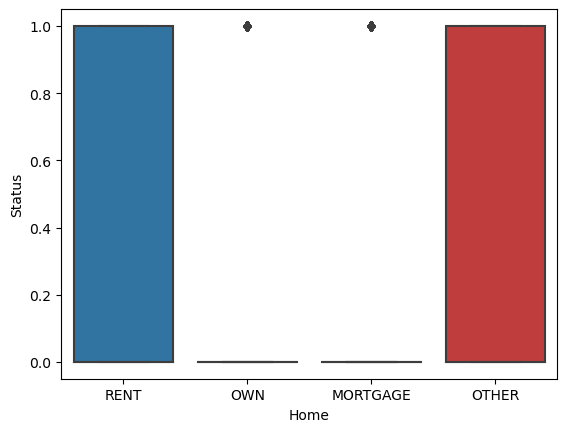

In [32]:
sns.boxplot(x="Home", y="Status", data=data)

<Axes: xlabel='Intent', ylabel='Status'>

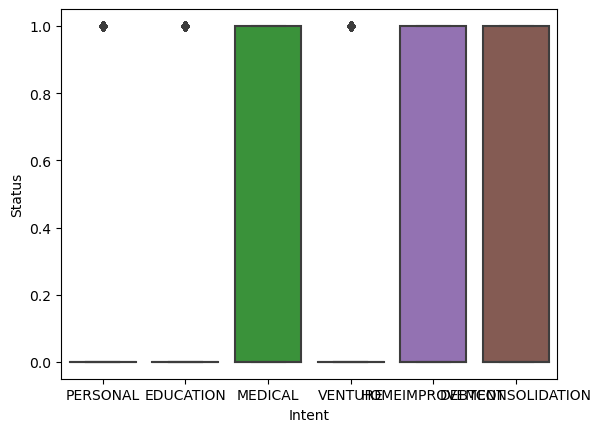

In [33]:
sns.boxplot(x="Intent", y="Status", data=data)

Lable Encoding

In [34]:
label_encoder_home = LabelEncoder()
label_encoder_intent = LabelEncoder()

# Encode the "Home" feature
label_encoder_home.fit(data_1["Home"])
data_1["Home_en"] = label_encoder_home.transform(data_1["Home"])
data_1.drop("Home", axis=1, inplace=True)

# Encode the "Intent" feature
label_encoder_intent.fit(data_1["Intent"])
data_1["Intent_en"] = label_encoder_intent.transform(data_1["Intent"])
data_1.drop("Intent", axis=1, inplace=True)

In [35]:
data_1.head()

,Age,Income,Emp_length,Amount,Rate,Percent_income,Default_Y,Cred_length,Status,Home_en,Intent_en
0,22,59000,123.0,35000,16.02,0.59,1,3,1,3,4
1,21,9600,5.0,1000,11.14,0.10,0,2,0,2,1
2,25,9600,1.0,5500,12.87,0.57,0,3,1,0,3
3,23,65500,4.0,35000,15.23,0.53,0,2,1,3,3
4,24,54400,8.0,35000,14.27,0.55,1,4,1,3,3


In [36]:
data_12=data_1.reindex(columns=["Age","Income","Home_en","Emp_length","Intent_en","Amount","Rate","Percent_income","Default_Y","Cred_length","Status"])

In [37]:
data_12.round(2)

,Age,Income,Home_en,Emp_length,Intent_en,Amount,Rate,Percent_income,Default_Y,Cred_length,Status
0,22,59000,3,123.0,4,35000,16.02,0.59,1,3,1
1,21,9600,2,5.0,1,1000,11.14,0.10,0,2,0
2,25,9600,0,1.0,3,5500,12.87,0.57,0,3,1
3,23,65500,3,4.0,3,35000,15.23,0.53,0,2,1
4,24,54400,3,8.0,3,35000,14.27,0.55,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,5800,13.16,0.11,0,30,0
32577,54,120000,0,4.0,4,17625,7.49,0.15,0,19,0
32578,65,76000,3,3.0,2,35000,10.99,0.46,0,28,1
32579,56,150000,0,5.0,4,15000,11.48,0.10,0,26,0


In [38]:
data_12.head()

,Age,Income,Home_en,Emp_length,Intent_en,Amount,Rate,Percent_income,Default_Y,Cred_length,Status
0,22,59000,3,123.0,4,35000,16.02,0.59,1,3,1
1,21,9600,2,5.0,1,1000,11.14,0.10,0,2,0
2,25,9600,0,1.0,3,5500,12.87,0.57,0,3,1
3,23,65500,3,4.0,3,35000,15.23,0.53,0,2,1
4,24,54400,3,8.0,3,35000,14.27,0.55,1,4,1


array([[<Axes: title={'center': 'Income'}>]], dtype=object)

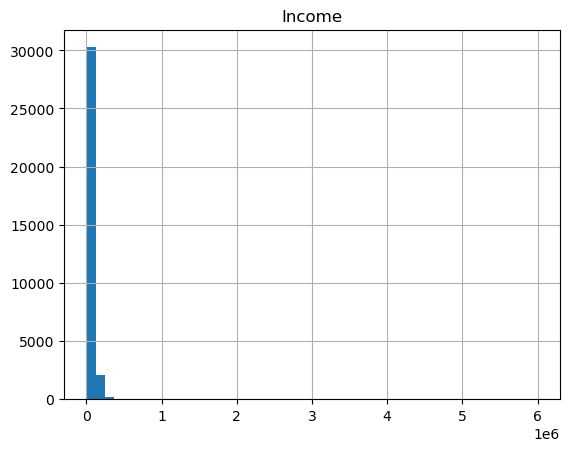

In [39]:
data_12.hist(column='Income', bins=50)

array([[<Axes: title={'center': 'Home_en'}>]], dtype=object)

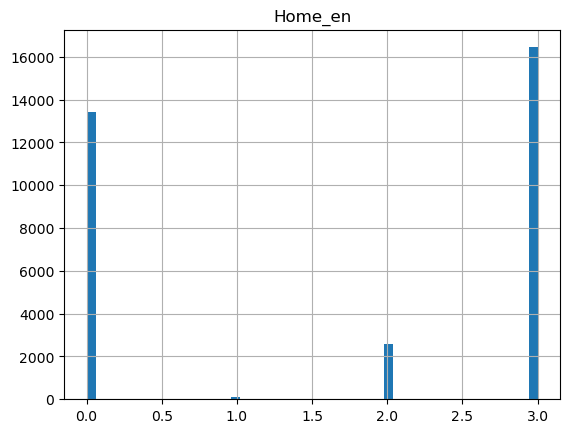

In [40]:
data_12.hist(column='Home_en', bins=50)

array([[<Axes: title={'center': 'Emp_length'}>]], dtype=object)

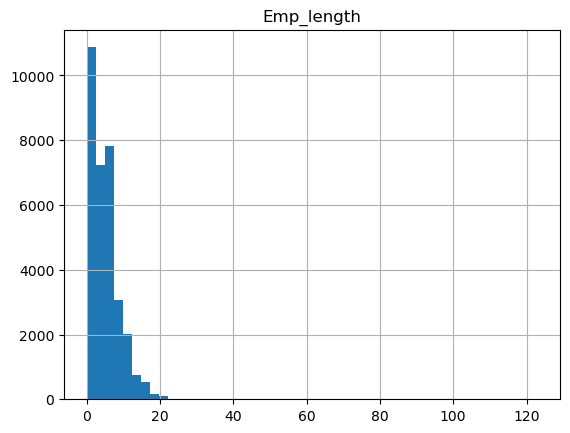

In [41]:
data_12.hist(column='Emp_length', bins=50)

Imbalance Data Handling

In [42]:
data_12.value_counts("Status")

Status
0    25473
1     7108
dtype: int64

In [43]:
x=data_12.iloc[:,:10]
y=data_12.iloc[:,10]

In [44]:
smt=SMOTE()

In [45]:
x_sm,y_sm=smt.fit_resample(x,y)

In [46]:
y_sm.value_counts()

1    25473
0    25473
Name: Status, dtype: int64

In [47]:
x_sm.shape

(50946, 10)

In [48]:
y_sm.shape

(50946,)

In [49]:
# from imblearn.over_sampling import SMOTE
# import pandas as pd

# # Assuming data_12 is your original DataFrame
# x = data_12.iloc[:, :10]
# y = data_12.iloc[:, 10]

# # Apply SMOTE to balance the data
# smt = SMOTE()
# x_sm, y_sm = smt.fit_resample(x, y)

# # Convert the newly generated data to a DataFrame
# new_data = pd.DataFrame(x_sm, columns=x.columns)
# new_data["target_variable"] = y_sm

# # Concatenate the new data with the original DataFrame
# data_12_balanced = pd.concat([data_12, new_data], ignore_index=True)

# # Now data_12_balanced contains the original data plus the newly generated data


In [50]:
X=x_sm.values
y=y_sm.values

In [51]:
# fig,ax=plt.subplots(1, 10, figsize=(15, 3), sharey=True)
# for i in range(len(ax)):
#     ax[i].scatter(X[:,i],y)
#     ax[i].set_xlabel(X[i])
# ax[0].set_ylabel("Status")
# plt.show()

Train Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [53]:
X_features=["Age","Income","Home_en","Emp_length","Intent_en","Amount","Rate","Percent_income","Default_Y","Cred_length"]

Normalize Data

In [54]:
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))

In [55]:
X_train_norm[0:5]

array([[ 0.59725784,  0.3289976 ,  0.8530806 , -0.67044623, -0.80524957,
        -0.01034254, -0.08479111, -0.55835514,  2.36624032,  0.63478004],
       [-0.23939253, -0.10632146, -0.6098253 ,  0.11938763,  0.41591327,
         0.68668862,  0.65798885,  0.5824982 , -0.42261134, -0.41135153],
       [ 0.26259769,  0.3413622 , -1.34127824,  0.06583894, -1.41583099,
        -0.31020537, -2.03267508, -0.80282371, -0.42261134, -0.14981864],
       [-0.23939253,  0.40887005, -1.34127824, -0.9343774 ,  1.0264947 ,
         1.03917738, -0.46201071,  0.01207153, -0.42261134, -0.67288442],
       [-0.74138275, -0.10632146,  0.8530806 , -0.97650981, -0.80524957,
        -0.46013679,  1.26383776, -0.55835514, -0.42261134, -0.67288442]])

# Classification

# K nearest neighbor (KNN)

In [56]:
knncl=KNeighborsClassifier(n_neighbors=6)

In [57]:
knncl.fit(X_train_norm,y_train)

KNeighborsClassifier(n_neighbors=6)

In [58]:
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm[0:5]

array([[ 1.30462860e+00,  4.20928162e-01,  8.54759426e-01,
         1.17155473e-01, -7.90669427e-01, -6.32808011e-04,
        -1.34076911e+00, -6.38146410e-01, -4.17899234e-01,
         1.15293320e+00],
       [ 1.12342044e-01, -5.24265402e-02,  8.54759426e-01,
        -4.46746520e-01, -1.79741200e-01,  2.25407486e+00,
         1.22256841e-01,  1.99368650e+00, -4.17899234e-01,
         3.77837141e-01],
       [ 2.82668695e-01, -5.97976112e-01,  1.20482023e-01,
         6.30084134e-02,  1.65304348e+00, -4.51574342e-01,
        -1.50852705e+00,  2.66546153e-01, -4.17899234e-01,
         1.15293320e+00],
       [-2.28311259e-01, -7.03365906e-01,  8.54759426e-01,
        -1.40303070e-01,  4.31187028e-01, -5.26731265e-01,
         7.82014023e-01,  5.13280488e-01,  2.39292135e+00,
        -9.13989616e-01],
       [-7.39291214e-01, -6.13180375e-02,  8.54759426e-01,
         3.59783351e-01, -1.40159765e+00, -1.06620765e+00,
         8.46551106e-01, -1.22835693e+00, -4.17899234e-01,
        -6.

Predicting

In [59]:
yhat = knncl.predict(X_test_norm)
yhat[0:5]

array([0, 1, 0, 1, 1], dtype=int64)

Accuracy evaluation

In [60]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knncl.predict(X_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8794533320247325
Test set Accuracy:  0.8317958783120707


Accuracy of KNN for different values of k.

In [61]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knncl = KNeighborsClassifier(n_neighbors = n).fit(X_train_norm,y_train)
    yhat=knncl.predict(X_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.84062807, 0.83189401, 0.83473994, 0.83424926, 0.83660451,
       0.83179588, 0.83356232, 0.83395486, 0.83120707])

Plot the model accuracy for a different number of neighbors.

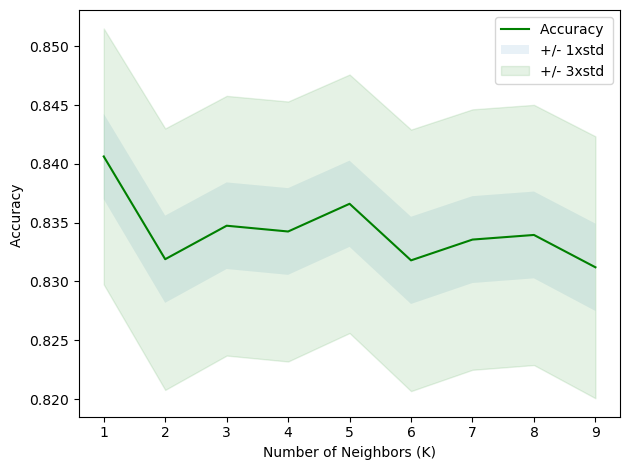

In [62]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

When k=7

In [79]:
k = 5
neigh7 = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm,y_train)
yhat7 = neigh7.predict(X_test_norm)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh7.predict(X_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat7))

Train set Accuracy:  0.8893169103935616
Test set Accuracy:  0.8366045142296369


Cross Validation

In [64]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

num_folds = 10

cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

cross_val_results = cross_val_score(knn_classifier, X_train_norm, y_train, cv=cv_strategy, scoring='accuracy')

print("Cross-Validation Results:")
print(cross_val_results)
print("Mean Accuracy: {:.2f}".format(cross_val_results.mean()))

Cross-Validation Results:
[0.8390579  0.83316977 0.82728165 0.8314524  0.83022571 0.81452404
 0.83190184 0.8191411  0.82576687 0.82625767]
Mean Accuracy: 0.83


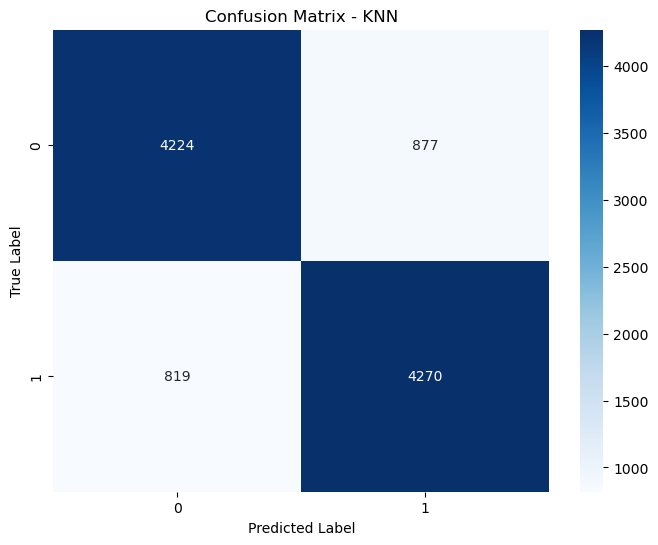

In [65]:
# Compute the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, yhat7)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')
plt.show()


# Decision Trees

In [66]:
clt=DecisionTreeClassifier(criterion="entropy",max_depth=4)
clt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [67]:
# plt.figure(figsize=(20,20))
# plot_tree(clt,feature_names=data_12.columns,class_names=["1","2"],filled=True)
# plt.show()

Prediction

In [68]:
y_pred_tree = clt.predict(X_test)

In [69]:
print (y_pred_tree [0:5])
print (y_test [0:5])

[0 1 0 1 1]
[0 1 0 1 1]


In [70]:
confusion_matrix(y_test,y_pred_tree)

array([[4594,  507],
       [1422, 3667]], dtype=int64)

Evaluation

In [71]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred_tree))

DecisionTrees's Accuracy:  0.8106967615309126


In [72]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83      5101
           1       0.88      0.72      0.79      5089

    accuracy                           0.81     10190
   macro avg       0.82      0.81      0.81     10190
weighted avg       0.82      0.81      0.81     10190



Visualization

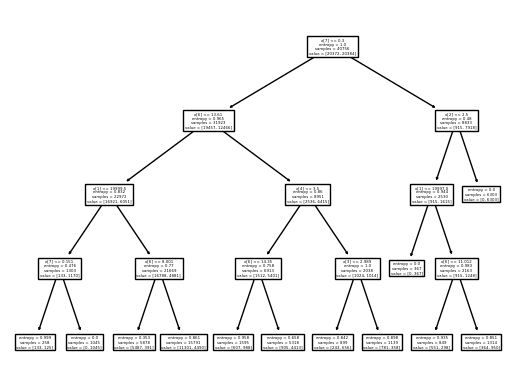

In [73]:
tree.plot_tree(clt)
plt.show()

In [74]:
num_folds = 10

cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

cross_val_results = cross_val_score(clt, X_train, y_train, cv=cv_strategy, scoring='accuracy')

print("Cross-Validation Results:")
print(cross_val_results)
print("Mean Accuracy: {:.2f}".format(cross_val_results.mean()))

Cross-Validation Results:
[0.81771344 0.80716389 0.79538763 0.8186948  0.80520118 0.80888126
 0.80588957 0.8        0.81693252 0.80785276]
Mean Accuracy: 0.81


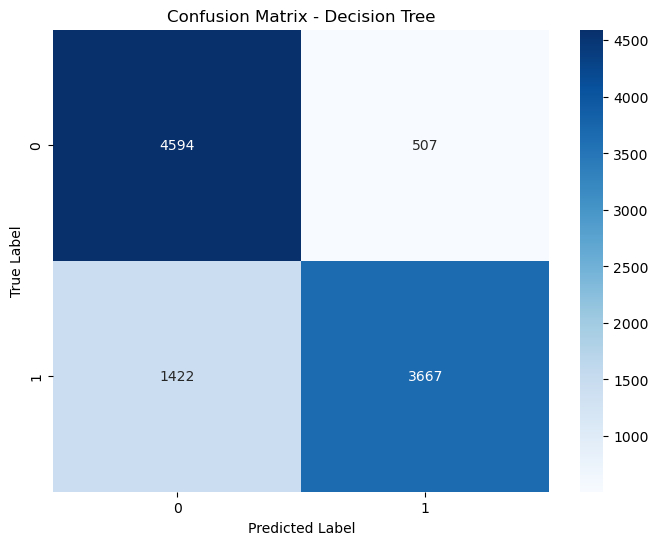

In [75]:
# Compute the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_tree)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Accuracy (KNN): 0.83
Accuracy (Decision Tree): 0.81


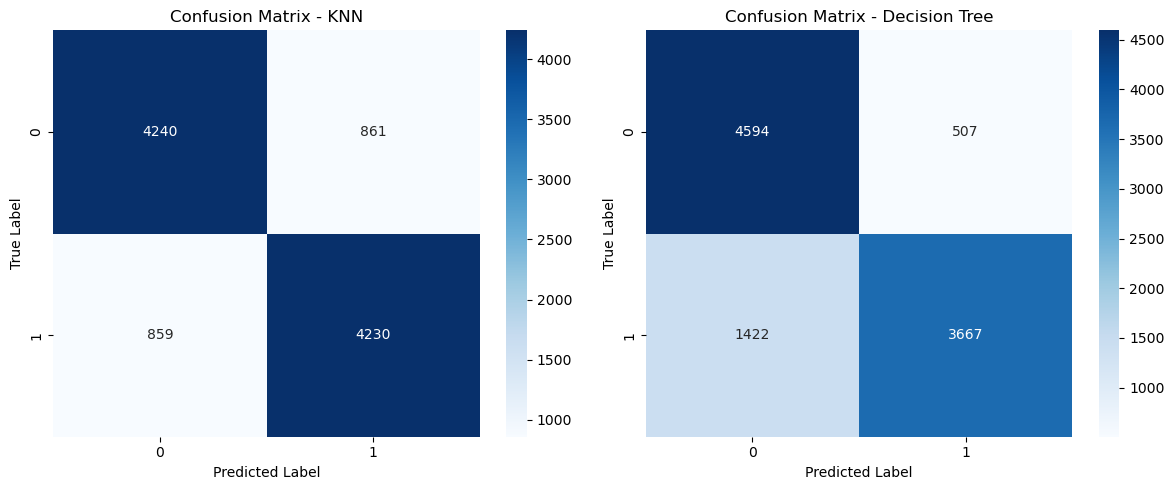

In [76]:
# Compute and print the accuracy for KNN
accuracy_knn = accuracy_score(y_test, yhat)
print(f"Accuracy (KNN): {accuracy_knn:.2f}")

# Compute and print the accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy (Decision Tree): {accuracy_dt:.2f}")

# Plot confusion matrices side by side
conf_matrix_knn = confusion_matrix(y_test, yhat)
conf_matrix_dt = confusion_matrix(y_test, y_pred_tree)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for KNN
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix - KNN')

# Plot for Decision Tree
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axes[1])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix - Decision Tree')

plt.tight_layout()
plt.show()


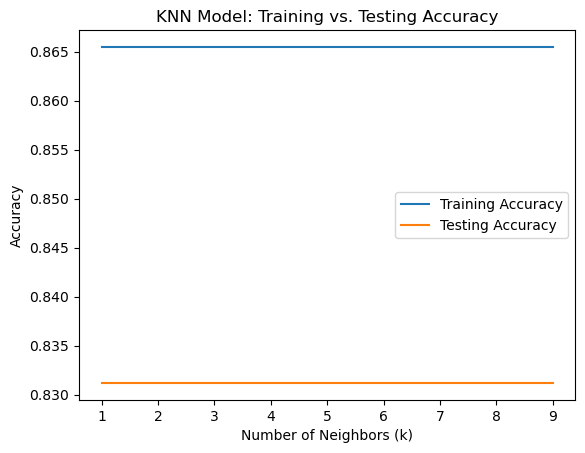

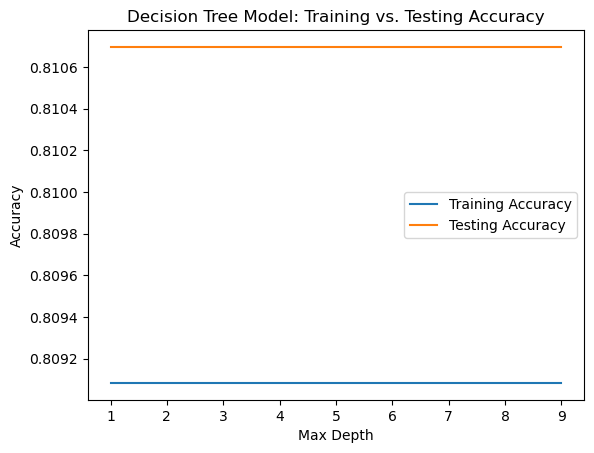

In [77]:
# KNN Model
k_values = [1, 3, 5, 7, 9]
train_accuracies = []
test_accuracies = []

for k in k_values:
    
    
    # Training accuracy
    train_pred = knncl.predict(X_train_norm)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_acc)
    
    # Testing accuracy
    test_pred = knncl.predict(X_test_norm)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_acc)

# Plot the accuracy vs. k
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Model: Training vs. Testing Accuracy')
plt.legend()
plt.show()

# Decision Tree Model
depth_values = [1, 3, 5, 7, 9]
train_accuracies_dt = []
test_accuracies_dt = []

for depth in depth_values:
    
    
    # Training accuracy
    train_pred_dt = clt.predict(X_train)
    train_acc_dt = accuracy_score(y_train, train_pred_dt)
    train_accuracies_dt.append(train_acc_dt)
    
    # Testing accuracy
    test_pred_dt = clt.predict(X_test)
    test_acc_dt = accuracy_score(y_test, test_pred_dt)
    test_accuracies_dt.append(test_acc_dt)

# Plot the accuracy vs. max depth
plt.plot(depth_values, train_accuracies_dt, label='Training Accuracy')
plt.plot(depth_values, test_accuracies_dt, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Model: Training vs. Testing Accuracy')
plt.legend()
plt.show()

In [78]:
# KNN model
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
knn_scores = cross_val_score(knncl, X_train_norm, y_train, cv=10, scoring='accuracy')

# Decision Tree model
dt_scores = cross_val_score(clt, X, y, cv=10, scoring='accuracy')

# Print average scores
print("KNN Average Accuracy: {:.2f}".format(np.mean(knn_scores)))
print("Decision Tree Average Accuracy: {:.2f}".format(np.mean(dt_scores)))


KNN Average Accuracy: 0.83
Decision Tree Average Accuracy: 0.81
